In [219]:
from pathlib import Path
from lagom.experiment import Configurator

from lagom import pickle_load

from lagom.core.plotter import CurvePlot

In [274]:
log_folder = Path('logs')

list_config = pickle_load(log_folder/'configs.pkl')
configs = Configurator.to_dataframe(list_config)
configs

,ID,cuda,env.id,env.standardize,network.recurrent,network.hidden_sizes,algo.lr,algo.use_lr_scheduler,algo.gamma,agent.standardize_Q,...,agent.constant_std,agent.std_state_dependent,agent.init_std,train.timestep,train.N,train.T,eval.N,log.record_interval,log.print_interval,log.dir
0,0,True,HalfCheetah-v2,True,True,[16],0.001,False,0.99,False,...,None,False,0.5,1000000.0,1,5,100,100,500,logs
1,1,True,HalfCheetah-v2,True,True,[16],0.001,False,0.99,False,...,None,False,0.5,1000000.0,5,5,100,100,500,logs
2,2,True,HalfCheetah-v2,True,True,[16],0.001,False,0.99,False,...,None,False,0.5,1000000.0,10,5,100,100,500,logs
3,3,True,HalfCheetah-v2,True,True,[16],0.001,False,0.99,False,...,None,False,0.5,1000000.0,16,5,100,100,500,logs
4,4,True,HalfCheetah-v2,True,True,[32],0.001,False,0.99,False,...,None,False,0.5,1000000.0,1,5,100,100,500,logs
5,5,True,HalfCheetah-v2,True,True,[32],0.001,False,0.99,False,...,None,False,0.5,1000000.0,5,5,100,100,500,logs
6,6,True,HalfCheetah-v2,True,True,[32],0.001,False,0.99,False,...,None,False,0.5,1000000.0,10,5,100,100,500,logs
7,7,True,HalfCheetah-v2,True,True,[32],0.001,False,0.99,False,...,None,False,0.5,1000000.0,16,5,100,100,500,logs
8,8,True,HalfCheetah-v2,True,True,[64],0.001,False,0.99,False,...,None,False,0.5,1000000.0,1,5,100,100,500,logs
9,9,True,HalfCheetah-v2,True,True,[64],0.001,False,0.99,False,...,None,False,0.5,1000000.0,5,5,100,100,500,logs


In [221]:
Configurator.dataframe_groupview(configs, ['algo.use_lr_scheduler', 'agent.standardize_Q', 
                                           'agent.standardize_adv', 'agent.init_std'])

ID  \
algo.use_lr_scheduler agent.standardize_Q agent.standardize_adv agent.init_std       
False                 False               False                 0.5              0   
                                                                0.5              1   
                                                                0.5              2   
                                                                0.5              3   
                                                                0.5              4   
                                                                0.5              5   
                                                                0.5              6   
                                                                0.5              7   
                                                                0.5              8   
                                                                0.5              9   
                                                                0.5             10   
                                                                0.5             11   
                                                                0.5             12   
                                                                0.5             13   
                                                                0.5             14   
                                                                0.5             15   

                                                                                cuda  \
algo.use_lr_scheduler agent.standardize_Q agent.standardize_adv agent.init_std         
False                 False               False                 0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   
                                                                0.5             True   

                                                                                        env.id  \
algo.use_lr_scheduler agent.standardize_Q agent.standardize_adv agent.init_std                   
False                 False               False                 0.5             HalfCheetah-v2   
                                                                0.5             HalfCheetah-v2   
                                                                0.5             HalfCheetah-v2   
                                                                0.5             HalfCheetah-v2   
                                                                0.5             HalfCheetah-v2   
                                                                0.5             HalfCheetah-v2   
                                                                0.5             HalfCheetah-v2   
                                                                

In [275]:
def load_results(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    
    list_result = []
    for sub in p.iterdir():
        if sub.is_dir() and (sub/f).exists():
            list_result.append(pickle_load(sub/f))
            
    return list_result


def get_returns(list_result):
    returns = []
    for result in list_result:
        #x_values = [i['evaluation_iteration'][0] for i in result]
        x_values = [i['accumulated_trained_timesteps'][0] for i in result]
        y_values = [i['average_return'][0] for i in result]
        returns.append([x_values, y_values])
        
    return returns


In [298]:
ID = 0
env_id = configs.loc[configs['ID'] == ID]['env.id'].values[0]


def get_xy(ID):    
    list_result = load_results('logs', ID, 'eval_logs.pkl')
    returns = get_returns(list_result)
    x_values, y_values = zip(*returns)
    
    return x_values, y_values

In [290]:
plot = CurvePlot()

for ID in [4]:
    x_values, y_values = get_xy(ID=ID)
    plot.add('A2C' + str(ID), y_values, xvalues=x_values)

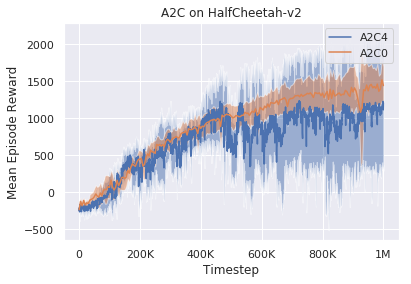

In [344]:
ax = plot(title=f'A2C on {env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

In [343]:
x_values, y_values = get_xy(ID=6)
plot.add('A2C' + str(ID), y_values, xvalues=x_values)

In [9]:
ax.figure.savefig('data/result.png')